<div style="color:white;background-color:#0B244E;padding:20px;width:100%">
<img src="https://www.eseg.edu.br/assets/dist/assets/images/logo/136x136.svg" style=""></img>
</div>
<div style="color:white;background-color:#0B244E;padding:20px;width:100%;border-top: 1px solid white">
Data Science 1 / Prof. Fernando Pablos
</div>

<h1>Análise Exploratória e limpeza de dados (EDA)</h1>

<p>Como já falado na parte teórica, nem sempre nossos dados chegam para nós da forma ideal, para isso precisamos explorá-los e, se necessário, corrigí-los antes de realizarmos nossas análises.</p>
<p>Vamos começar carregando nossos dados como já aprendemos em aulas anteriores:</p>




In [2]:
import pandas as pd

df = pd.read_excel('eda.xlsx')
df.head()

,Unnamed: 0,dt1,bairro,dt5,cnpj,Estado,dt30,Lucro Líquido Arredondado (R$),Ano de Fundação,Tipo:
0,0,Marques,Boa União 1ª Seção,Telecomunicações,39.804.617/0001-03,PI,"Vale de Vargas, 588",-263581.0,2018.0,SA
1,1,Moraes,Mariquinhas,Telecomunicações,70.395.681/0001-10,RO,"Feira Macedo, 9",11217.0,2018.0,Lemitada
2,2,Peixoto Melo - EI,Boa Viagem,Bancário,54.819.672/0001-52,GO,"Conjunto de Melo, 25",-337545.0,1974.0,Limitada
3,3,Barbosa e Filhos,Venda Nova,Energia,43.986.175/0001-22,PI,"Passarela Sophia Nunes, 3",267880.0,2009.0,Microempreendedor Individual
4,4,Freitas,São Marcos,Bancário,04.196.278/0001-37,PE,"Viaduto de Fonseca, 72",446051.0,1986.0,Sociedade Anônima


<p>Podemos observar alguns problemas no nome de nossas colunas... veja, dt1, dt5 e dt30, o que será que são essas colunas?</p>
<p style="color:red">dt1 parece ser o nome da empresa, dt5 sua área de atuação e dt30 seu endereço, vamos corrigir.</p>

In [3]:
df = df.rename(columns={'dt1': 'Nome da empresa', 'dt5': 'Área de Atuação', 'dt30': 'Endereço'})
df.head()

,Unnamed: 0,Nome da empresa,bairro,Área de Atuação,cnpj,Estado,Endereço,Lucro Líquido Arredondado (R$),Ano de Fundação,Tipo:
0,0,Marques,Boa União 1ª Seção,Telecomunicações,39.804.617/0001-03,PI,"Vale de Vargas, 588",-263581.0,2018.0,SA
1,1,Moraes,Mariquinhas,Telecomunicações,70.395.681/0001-10,RO,"Feira Macedo, 9",11217.0,2018.0,Lemitada
2,2,Peixoto Melo - EI,Boa Viagem,Bancário,54.819.672/0001-52,GO,"Conjunto de Melo, 25",-337545.0,1974.0,Limitada
3,3,Barbosa e Filhos,Venda Nova,Energia,43.986.175/0001-22,PI,"Passarela Sophia Nunes, 3",267880.0,2009.0,Microempreendedor Individual
4,4,Freitas,São Marcos,Bancário,04.196.278/0001-37,PE,"Viaduto de Fonseca, 72",446051.0,1986.0,Sociedade Anônima


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      520 non-null    int64  
 1   Nome da empresa                 520 non-null    object 
 2   bairro                          520 non-null    object 
 3   Área de Atuação                 515 non-null    object 
 4   cnpj                            520 non-null    object 
 5   Estado                          520 non-null    object 
 6   Endereço                        520 non-null    object 
 7   Lucro Líquido Arredondado (R$)  517 non-null    float64
 8   Ano de Fundação                 516 non-null    float64
 9   Tipo:                           519 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 40.8+ KB


<p style="color:red;">Existem algumas células vazias, o que será que podemos fazer com elas? Temos algumas alternativas.</p>


In [6]:
#Para as células categóricas, podemos substituir pela moda
area_atuacao_moda = df['Área de Atuação'].mode()
df['Área de Atuação'] = df['Área de Atuação'].fillna(area_atuacao_moda[0])

tipo_moda = df['Tipo:'].mode()
df['Tipo:'] = df['Tipo:'].fillna(tipo_moda[0])

#Para as células numéricas, podemos pegar a mediana

lucro_mediana = df['Lucro Líquido Arredondado (R$)'].median()
df['Lucro Líquido Arredondado (R$)'] = df['Lucro Líquido Arredondado (R$)'].fillna(lucro_mediana)

ano_mediana = df['Ano de Fundação'].median()
df['Ano de Fundação'] = df['Ano de Fundação'].fillna(ano_mediana)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      520 non-null    int64  
 1   Nome da empresa                 520 non-null    object 
 2   bairro                          520 non-null    object 
 3   Área de Atuação                 520 non-null    object 
 4   cnpj                            520 non-null    object 
 5   Estado                          520 non-null    object 
 6   Endereço                        520 non-null    object 
 7   Lucro Líquido Arredondado (R$)  520 non-null    float64
 8   Ano de Fundação                 520 non-null    float64
 9   Tipo:                           520 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 40.8+ KB


<p>Tudo corrigido!</p>
<h2>Analisando dados categóricos</h2> 

<p>Um jeito interessante de analisar dados categóricos, é observar a contagem  e também gráficos de barras.</p>

Nome da empresa
Abreu Abreu Ltda.       1
Abreu S.A.              1
Abreu da Costa S.A.     1
Albuquerque             1
Almeida                 2
                       ..
da Rosa                 1
da Rosa Ribeiro - ME    1
da Rosa S/A             1
das Neves               3
das Neves Sousa - EI    1
Length: 333, dtype: int64


<AxesSubplot:xlabel='Nome da empresa'>

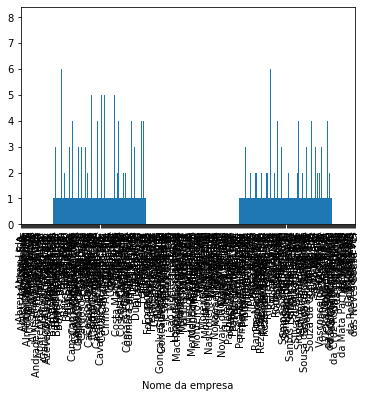

In [6]:
#Vamos começar analisando o nome das empresas

grupo_nome_empresa = df.groupby(['Nome da empresa']).size()
print(grupo_nome_empresa) #Visão de relatório
grupo_nome_empresa.plot.bar() #Visão de gráfico

<p style="color:red">Podemos observar que algumas empresas estão sendo repetidas duas ou mais vezes, isso é um problema</p>

In [7]:
#Irá nos mostrar os registros duplicados
df[df.duplicated(['Nome da empresa'])]

,Unnamed: 0,Nome da empresa,bairro,Área de Atuação,cnpj,Estado,Endereço,Lucro Líquido Arredondado (R$),Ano de Fundação,Tipo:
5,5,Freitas,Vila Petropolis,Energia,23.180.547/0001-11,RO,"Passarela de Brito, 4",512229.0,1985.0,Limitada
15,15,da Luz,Providencia,Metalúrgica,05.147.832/0001-59,PI,"Largo Castro, 27",-221552.0,1978.0,MEI
19,19,Rios,Comiteco,Bancário,40.368.259/0001-04,AM,"Praça Rezende, 15",-252015.0,2023.0,Ltda
22,22,Marques,Santa Rita,Metalúrgica,79.425.068/0001-72,DF,"Praça Pastor, 12",150373.0,1971.0,Ltda
46,46,Montenegro,Dom Joaquim,Serviços,47.530.698/0001-10,ES,"Núcleo de da Rocha, 43",-70668.0,1970.0,MEI
...,...,...,...,...,...,...,...,...,...,...
508,508,Lopes,Nova Pampulha,Energia,74.265.980/0001-90,RR,"Condomínio de Rocha, 296",-91508.0,2003.0,Microempreendedor Individual
509,509,Azevedo,Conjunto Jardim Filadélfia,Bancário,80.391.245/0001-26,RJ,"Feira Ana Sophia Cavalcanti, 48",505558.0,2006.0,EPP
510,510,Ferreira,São Benedito,Metalúrgica,94.167.852/0001-11,DF,"Fazenda Fonseca, 24",452952.0,1997.0,SA
511,511,Cavalcante,Barro Preto,Energia,41.369.580/0001-76,PI,"Setor de Siqueira, 4",250478.0,1995.0,EPP


<AxesSubplot:xlabel='Nome da empresa'>

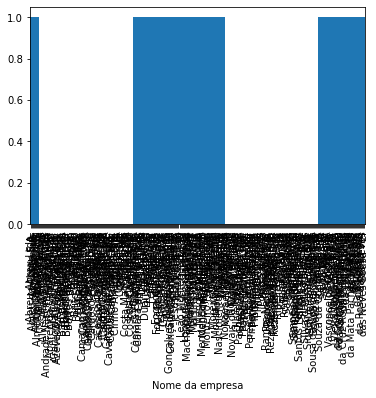

In [10]:
#Excluindo os duplicados, mantendo o primeiro registro

df = df.drop_duplicates(subset="Nome da empresa", keep='first')

#Mostrando novamente se ainda há registros duplicados
df[df.duplicated(['Nome da empresa'])]
grupo_nome_empresa = df.groupby(['Nome da empresa']).size()
grupo_nome_empresa.plot.bar() #Visão de gráfico

bairro
Acaba Mundo                  1
Ademar Maldonado             3
Aguas Claras                 2
Alto Das Antenas             1
Alto Vera Cruz               1
                            ..
Vila Trinta E Um De Março    2
Vila Vista Alegre            1
Vitoria                      2
Vitoria Da Conquista         1
Álvaro Camargos              1
Length: 242, dtype: int64


<AxesSubplot:xlabel='bairro'>

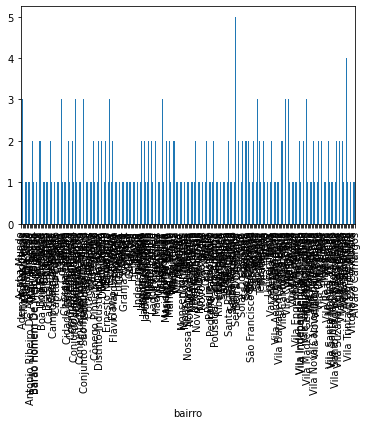

In [9]:
#Vamos ver agora os bairros, se há algo errado
grupo_bairro = df.groupby(['bairro']).size()
print(grupo_bairro)
grupo_bairro.plot.bar()

Parece estar tudo bem com essa coluna. Podemos ter várias empresas no mesmo bairro.

Área de Atuação
Bancário            60
Energia             55
Metalúrgica         83
Serviços            67
Telecomunicações    67
Teste                1
dtype: int64


<AxesSubplot:xlabel='Área de Atuação'>

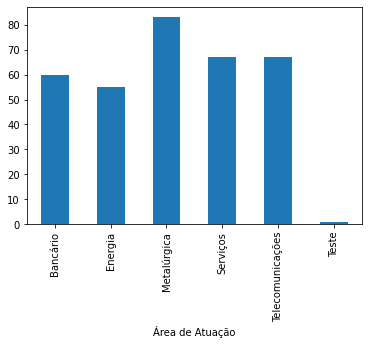

In [10]:
#Vamos ver a área de atuação da empresa

grupo_atuacao = df.groupby('Área de Atuação').size()
print(grupo_atuacao)
grupo_atuacao.plot.bar()

<p style="color:red">A área de atuação 'Teste' parece ser um erro de cadastro.</p>

Área de Atuação
Bancário            60
Energia             55
Metalúrgica         83
Serviços            67
Telecomunicações    67
dtype: int64


<AxesSubplot:xlabel='Área de Atuação'>

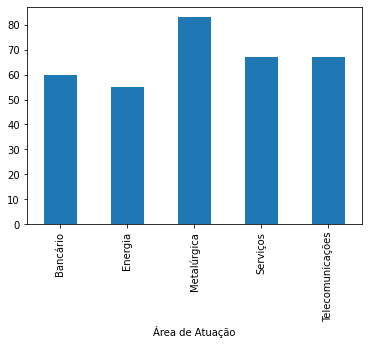

In [11]:
#Não vamos manter esses dados, pois podem impactar na análise erroneamente
df = df[df['Área de Atuação'] != 'Teste']

#Vamos ver agora se ainda aparecem:

grupo_atuacao = df.groupby('Área de Atuação').size()
print(grupo_atuacao)
grupo_atuacao.plot.bar()

Problema resolvido!

In [ ]:
#Vamos observar os CNPJ's

grupo_cnpj = df.groupby('cnpj').size()
print(grupo_cnpj)
grupo_cnpj.plot.bar()

Não temos CNPJ's repetidos, então não precisamos tratar essa coluna.

In [ ]:
#Vamos ver os estados

grupo_estado = df.groupby('Estado').size()
print(grupo_estado)
grupo_estado.plot.bar()

<p style="color:red">Os estados XX e ZZ não existem.</p>

In [ ]:
#Para resolver, vamos filtrar usando o pandas, removendo esses dados

df = df[(df['Estado'] != 'XX') & (df['Estado'] != 'ZZ')]

#E observamos se o problema persiste
grupo_estado = df.groupby('Estado').size()
print(grupo_estado)
grupo_estado.plot.bar()

Resolvido!

In [ ]:
#Vamos ver os tipos

grupo_tipo = df.groupby('Tipo:').size()
print(grupo_tipo)
grupo_tipo.plot.bar()

<p style="color:red">Temos tipos que deveriam ser o mesmo com nomes diferentes</p>

In [ ]:
# Vamos localizar esses registros e substituí-los, para padronizarmos 
# nossos dados

df['Tipo:'] = df['Tipo:'].replace({
    'Lemitada': 'Ltda',
    'Limitada': 'Ltda',
    'Microempreendedor Individual': 'MEI',
    'Sociedade Anônima': 'SA'
})

#Vamos ver se deu certo
grupo_tipo = df.groupby('Tipo:').size()
print(grupo_tipo)
grupo_tipo.plot.bar()

<h2>Analisando dados numéricos</h2> 

In [ ]:
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)  # Desativando a notação científica
#Vamos analisar o lucro líquido acumulado

df['Lucro Líquido Arredondado (R$)'].describe()


<p style="color: red">O mínimo parece ser muito baixo e o máximo muito alto, podemos verificar pontualmente esses valores e ver se não há mais casos.</p>

In [ ]:
sns.boxplot(df['Lucro Líquido Arredondado (R$)'])

In [ ]:
sns.histplot(df['Lucro Líquido Arredondado (R$)'])

In [ ]:
#Observamos que existem valores exagerados, vamos tentar removê-los

df = df[(df['Lucro Líquido Arredondado (R$)'] < 1000000000)]

sns.boxplot(df['Lucro Líquido Arredondado (R$)'])


In [ ]:
#Ainda parece que temos um valor exagerado negativo, vamos removê-lo também
df = df[df['Lucro Líquido Arredondado (R$)'] > -10000000]

sns.boxplot(df['Lucro Líquido Arredondado (R$)'])

Aparentemente nossos dados estão corretos agora.

In [ ]:
sns.histplot(df['Lucro Líquido Arredondado (R$)'])

Vamos ver se para o ano há algum problema

In [ ]:
df['Ano de Fundação'].describe()

In [ ]:
sns.histplot(df['Ano de Fundação'])

In [ ]:
sns.boxplot(df['Ano de Fundação'])

<p style="color: red">Bom, considerando que nossa base seja de um sistema atual, parece estranho ter empresas fundadadas antes dos anos 1800 e também não chegamos no ano 2900. Vamos remover.</p>

In [ ]:
df = df[(df['Ano de Fundação'] >= 1800) & (df['Ano de Fundação'] <= 2025)]
sns.histplot(df['Ano de Fundação'])

In [ ]:
sns.boxplot(df['Ano de Fundação'])

Para encerrar, vamos ver se há alguma correlação entre o ano de fundação e o lucro líquido e identificar se há outliers

In [ ]:
sns.scatterplot(data=df, x=df['Ano de Fundação'], y=df['Lucro Líquido Arredondado (R$)'])

In [ ]:
#Vamos analisar uma matriz de correlação também
df_correlacao = df[['Lucro Líquido Arredondado (R$)', 'Ano de Fundação']]
correlacao = df_correlacao.corr()
display(correlacao)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlacao,
    annot=True,       # Mostra os valores dentro dos quadrados
    cmap='coolwarm',  # Paleta de cores (azul/vermelho)
    vmin=-1,          # Valor mínimo da escala
    vmax=1,           # Valor máximo da escala
    linewidths=0.5
)
plt.title('Matriz de Correlação')
plt.show()

Não há correlação e, portanto, não conseguimos identificar outliers.

<p style="color: green">Agora nossa base está limpa para realizarmos as análises, ou para darmos início ao aprendizado de máquina.</p>